# (Cell 1) Imports, seed, and load data

In [1]:
# Cell 1: imports + seed + load data
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import random
import os

# Reproducibility (partial)
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)
random.seed(seed)

# Load Fashion MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print('Train shape:', x_train.shape, 'Train labels:', y_train.shape)
print('Test shape :', x_test.shape, 'Test labels :', y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28) Train labels: (60000,)
Test shape : (10000, 28, 28) Test labels : (10000,)


# (Cell 2) Preprocessing — normalization, flatten (NN), reshape (CNN)

In [2]:
# Cell 2: preprocessing
x_train = x_train.astype('float32') / 255.0
x_test  = x_test.astype('float32')  / 255.0

# For NN: flatten
x_train_nn = x_train.reshape((-1, 28*28))
x_test_nn  = x_test.reshape((-1, 28*28))

# For CNN: add channel dimension
x_train_cnn = x_train.reshape((-1, 28, 28, 1))
x_test_cnn  = x_test.reshape((-1, 28, 28, 1))

print('x_train_nn shape:', x_train_nn.shape)
print('x_train_cnn shape:', x_train_cnn.shape)


x_train_nn shape: (60000, 784)
x_train_cnn shape: (60000, 28, 28, 1)


# (Cell 3) Class names and sample visualization

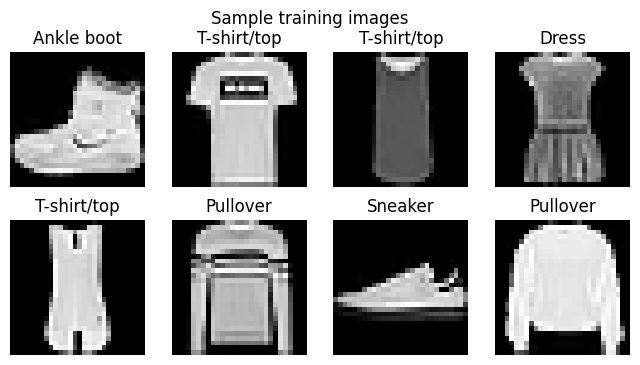

In [3]:
# Cell 3: class names + quick visual check
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

plt.figure(figsize=(8,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.suptitle('Sample training images')
plt.show()


# (Cell 4) Build Neural Network (dense-only)

In [4]:
# Cell 4: build NN
def build_nn(input_shape=(28*28,)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

nn_model = build_nn()
nn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

# (Cell 5) Train NN (validation + early stopping)

In [5]:
# Cell 5: train NN
epochs_nn = 20
nn_history = nn_model.fit(
    x_train_nn, y_train,
    validation_split=0.1,
    epochs=epochs_nn,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=2
)


Epoch 1/20
422/422 - 7s - 16ms/step - accuracy: 0.7788 - loss: 0.6180 - val_accuracy: 0.8443 - val_loss: 0.4277
Epoch 2/20
422/422 - 1s - 2ms/step - accuracy: 0.8435 - loss: 0.4315 - val_accuracy: 0.8643 - val_loss: 0.3699
Epoch 3/20
422/422 - 1s - 2ms/step - accuracy: 0.8595 - loss: 0.3899 - val_accuracy: 0.8735 - val_loss: 0.3479
Epoch 4/20
422/422 - 1s - 2ms/step - accuracy: 0.8674 - loss: 0.3660 - val_accuracy: 0.8688 - val_loss: 0.3590
Epoch 5/20
422/422 - 1s - 2ms/step - accuracy: 0.8726 - loss: 0.3478 - val_accuracy: 0.8753 - val_loss: 0.3450
Epoch 6/20
422/422 - 1s - 2ms/step - accuracy: 0.8765 - loss: 0.3360 - val_accuracy: 0.8815 - val_loss: 0.3287
Epoch 7/20
422/422 - 1s - 3ms/step - accuracy: 0.8799 - loss: 0.3217 - val_accuracy: 0.8820 - val_loss: 0.3167
Epoch 8/20
422/422 - 2s - 5ms/step - accuracy: 0.8850 - loss: 0.3123 - val_accuracy: 0.8805 - val_loss: 0.3267
Epoch 9/20
422/422 - 1s - 3ms/step - accuracy: 0.8855 - loss: 0.3072 - val_accuracy: 0.8850 - val_loss: 0.3144


# (Cell 6) Evaluate NN and show 5 sample predictions

313/313 - 2s - 7ms/step - accuracy: 0.8877 - loss: 0.3303
NN Test accuracy: 0.8877  (loss: 0.3303)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step


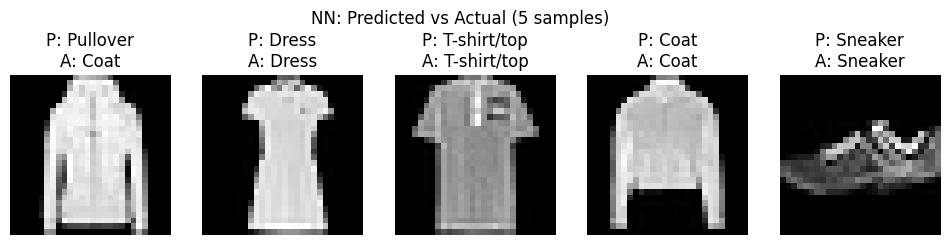

In [6]:
# Cell 6: evaluate NN + 5 sample predictions
nn_test_loss, nn_test_acc = nn_model.evaluate(x_test_nn, y_test, verbose=2)
print(f'NN Test accuracy: {nn_test_acc:.4f}  (loss: {nn_test_loss:.4f})')

# 5 random samples
indices = random.sample(range(len(x_test)), 5)
preds_nn = nn_model.predict(x_test_nn[indices])
pred_labels_nn = np.argmax(preds_nn, axis=1)

plt.figure(figsize=(12,3))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'P: {class_names[pred_labels_nn[i]]}\nA: {class_names[y_test[idx]]}')
    plt.axis('off')
plt.suptitle('NN: Predicted vs Actual (5 samples)')
plt.show()


# (Cell 7) Build Convolutional Neural Network (CNN)**bold text**

In [7]:
# Cell 7: build CNN
def build_cnn(input_shape=(28,28,1)):
    model = models.Sequential([
        layers.Input(shape=input_shape),
        layers.Conv2D(32, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

cnn_model = build_cnn()
cnn_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# (Cell 8) Train CNN (validation + early stopping)

In [8]:
# Cell 8: train CNN
epochs_cnn = 15
cnn_history = cnn_model.fit(
    x_train_cnn, y_train,
    validation_split=0.1,
    epochs=epochs_cnn,
    batch_size=128,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)],
    verbose=2
)


Epoch 1/15
422/422 - 9s - 22ms/step - accuracy: 0.7823 - loss: 0.6029 - val_accuracy: 0.8583 - val_loss: 0.3854
Epoch 2/15
422/422 - 2s - 4ms/step - accuracy: 0.8641 - loss: 0.3774 - val_accuracy: 0.8817 - val_loss: 0.3190
Epoch 3/15
422/422 - 2s - 4ms/step - accuracy: 0.8814 - loss: 0.3257 - val_accuracy: 0.8923 - val_loss: 0.2950
Epoch 4/15
422/422 - 2s - 4ms/step - accuracy: 0.8917 - loss: 0.2970 - val_accuracy: 0.8970 - val_loss: 0.2817
Epoch 5/15
422/422 - 2s - 4ms/step - accuracy: 0.9000 - loss: 0.2732 - val_accuracy: 0.9047 - val_loss: 0.2611
Epoch 6/15
422/422 - 2s - 4ms/step - accuracy: 0.9058 - loss: 0.2555 - val_accuracy: 0.9063 - val_loss: 0.2580
Epoch 7/15
422/422 - 2s - 5ms/step - accuracy: 0.9119 - loss: 0.2393 - val_accuracy: 0.9122 - val_loss: 0.2523
Epoch 8/15
422/422 - 2s - 5ms/step - accuracy: 0.9166 - loss: 0.2264 - val_accuracy: 0.9110 - val_loss: 0.2588
Epoch 9/15
422/422 - 2s - 4ms/step - accuracy: 0.9223 - loss: 0.2116 - val_accuracy: 0.9115 - val_loss: 0.2469


# (Cell 9) Evaluate CNN and show 5 sample predictions

313/313 - 2s - 6ms/step - accuracy: 0.9120 - loss: 0.2579
CNN Test accuracy: 0.9120  (loss: 0.2579)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 405ms/step


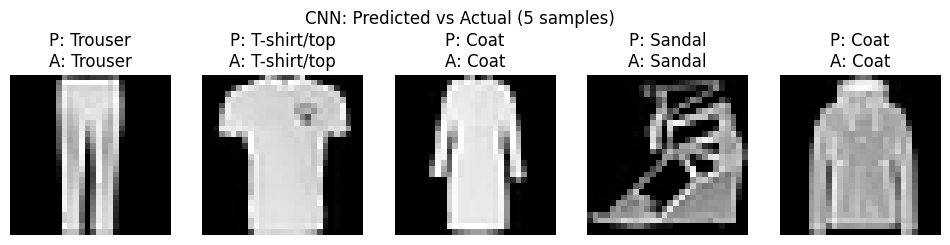

In [9]:
# Cell 9: evaluate CNN + 5 sample predictions
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=2)
print(f'CNN Test accuracy: {cnn_test_acc:.4f}  (loss: {cnn_test_loss:.4f})')

indices = random.sample(range(len(x_test)), 5)
preds_cnn = cnn_model.predict(x_test_cnn[indices])
pred_labels_cnn = np.argmax(preds_cnn, axis=1)

plt.figure(figsize=(12,3))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f'P: {class_names[pred_labels_cnn[i]]}\nA: {class_names[y_test[idx]]}')
    plt.axis('off')
plt.suptitle('CNN: Predicted vs Actual (5 samples)')
plt.show()


# (Cell 10) Plot training history (loss & accuracy)

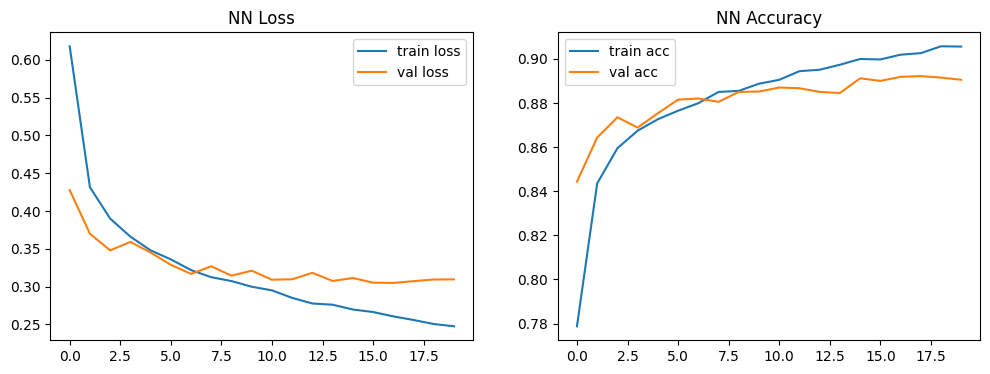

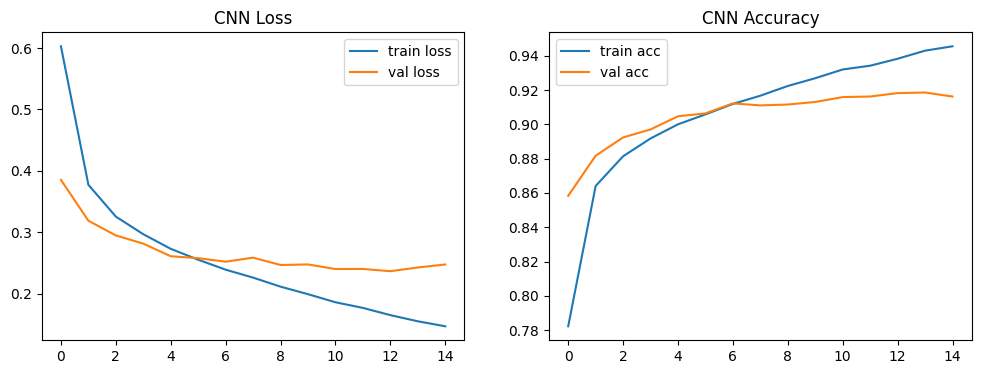

In [10]:
# Cell 10: plot training history
def plot_history(h, title):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(h.history['loss'], label='train loss')
    plt.plot(h.history.get('val_loss', []), label='val loss')
    plt.title(title + ' Loss')
    plt.legend()
    plt.subplot(1,2,2)
    plt.plot(h.history['accuracy'], label='train acc')
    plt.plot(h.history.get('val_accuracy', []), label='val acc')
    plt.title(title + ' Accuracy')
    plt.legend()
    plt.show()

plot_history(nn_history, 'NN')
plot_history(cnn_history, 'CNN')


# (Cell 11) Final comparison

In [11]:
# Cell 11: final comparison
print('NN Test accuracy :', nn_test_acc)
print('CNN Test accuracy:', cnn_test_acc)
if nn_test_acc > 0:
    improvement = (cnn_test_acc - nn_test_acc) / nn_test_acc * 100
    print(f'CNN performed better than NN by {improvement:.2f}% (relative improvement).')
else:
    print('Cannot compute relative improvement (NN accuracy is 0).')


NN Test accuracy : 0.8877000212669373
CNN Test accuracy: 0.9120000004768372
CNN performed better than NN by 2.74% (relative improvement).
